In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import SRTP_Deep_RNN_Utilize_new as srtp

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data_dict = {}
filenum = 11

In [3]:
data_dict['data1'] = srtp.read_data("SRTP_Mea_2_2\\train_HYC_2_7_0.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 8,print_shape = True)

(14975, 8)


In [4]:
data_dict['data2'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_1.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(35283, 7)


In [5]:
data_dict['data3'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_2.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(25715, 7)


In [6]:
data_dict['data4'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_3.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(28840, 7)


In [7]:
data_dict['data5'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_4.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(23802, 7)


In [8]:
data_dict['data6'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_5.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(23159, 7)


In [9]:
data_dict['data7'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_6.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(25307, 7)


In [10]:
data_dict['data8'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_8.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(31865, 7)


In [11]:
data_dict['data9'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_9.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(24954, 7)


In [12]:
data_dict['data10'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_10.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(26397, 7)


In [13]:
data_dict['data11'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_11.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(31145, 7)


(15675, 8)


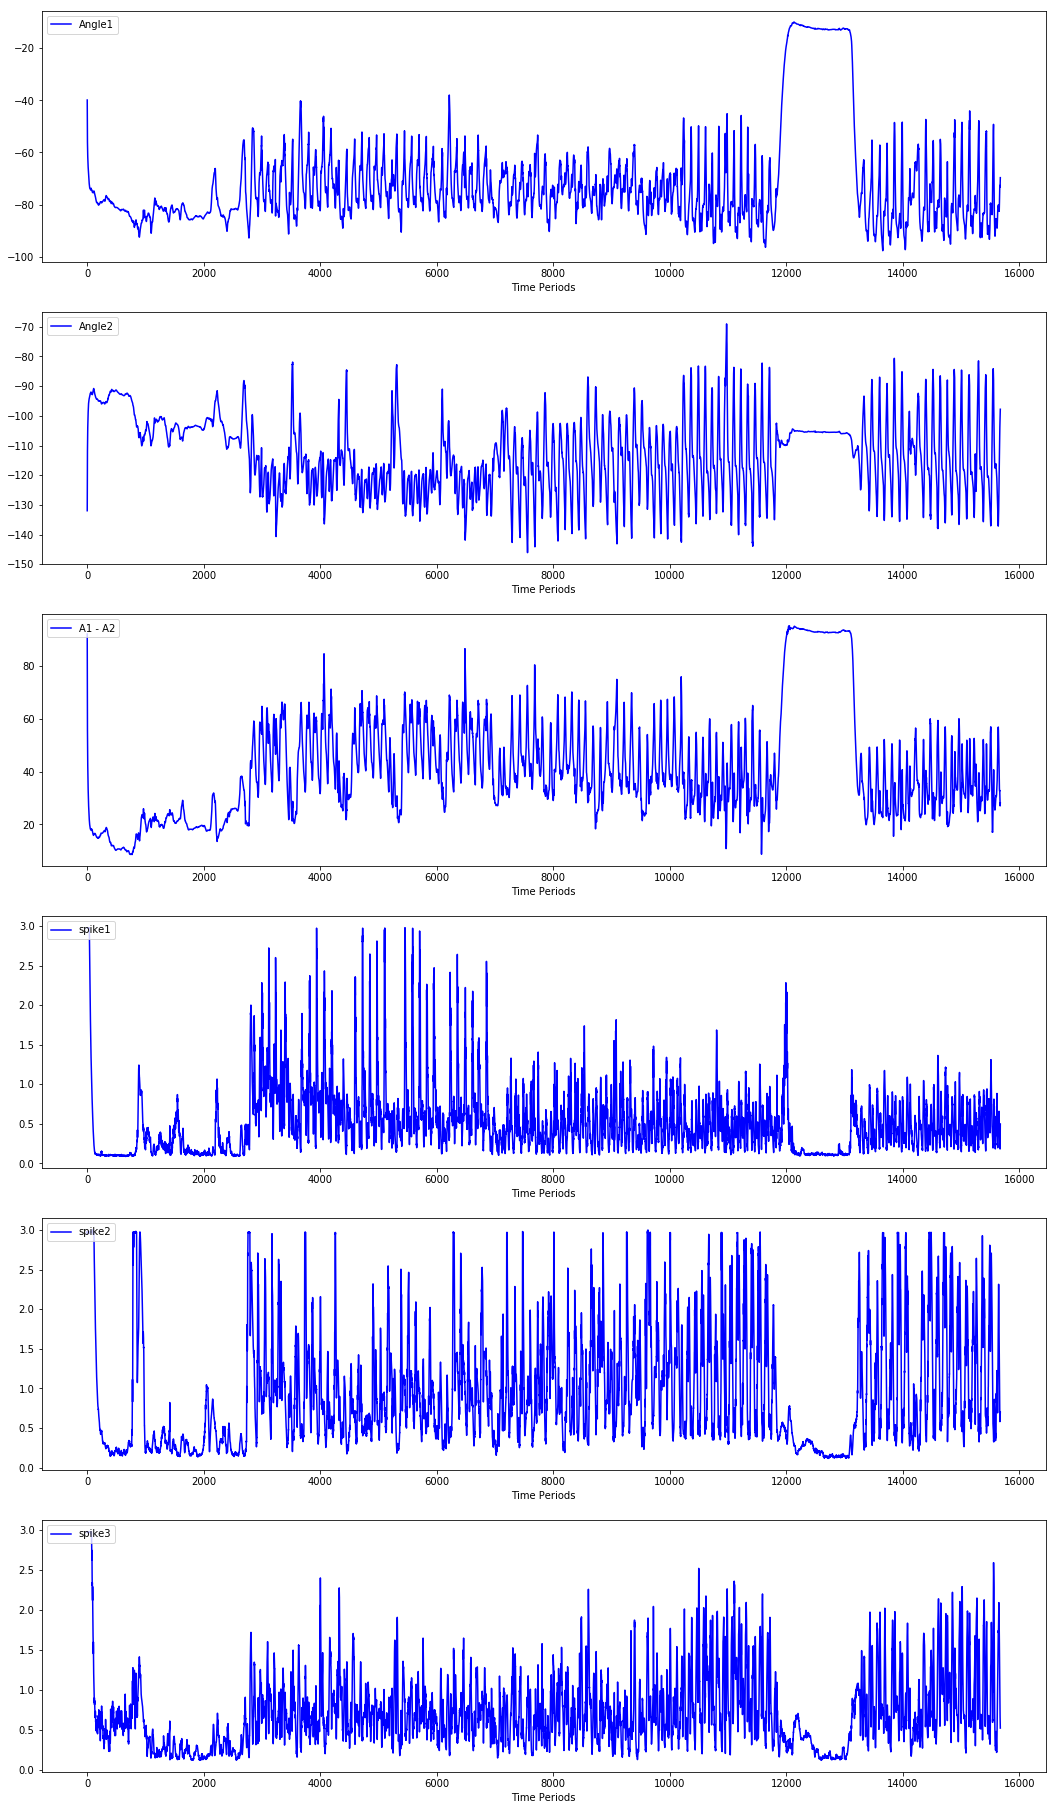

In [14]:
mcu_test4 = srtp.read_data("SRTP_Mea_2_2\\MCU_Test_3.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 8,print_shape = True)
srtp.main_visualize(mcu_test4,0,None,color = 'b',line_type = '-')

(16375, 8)


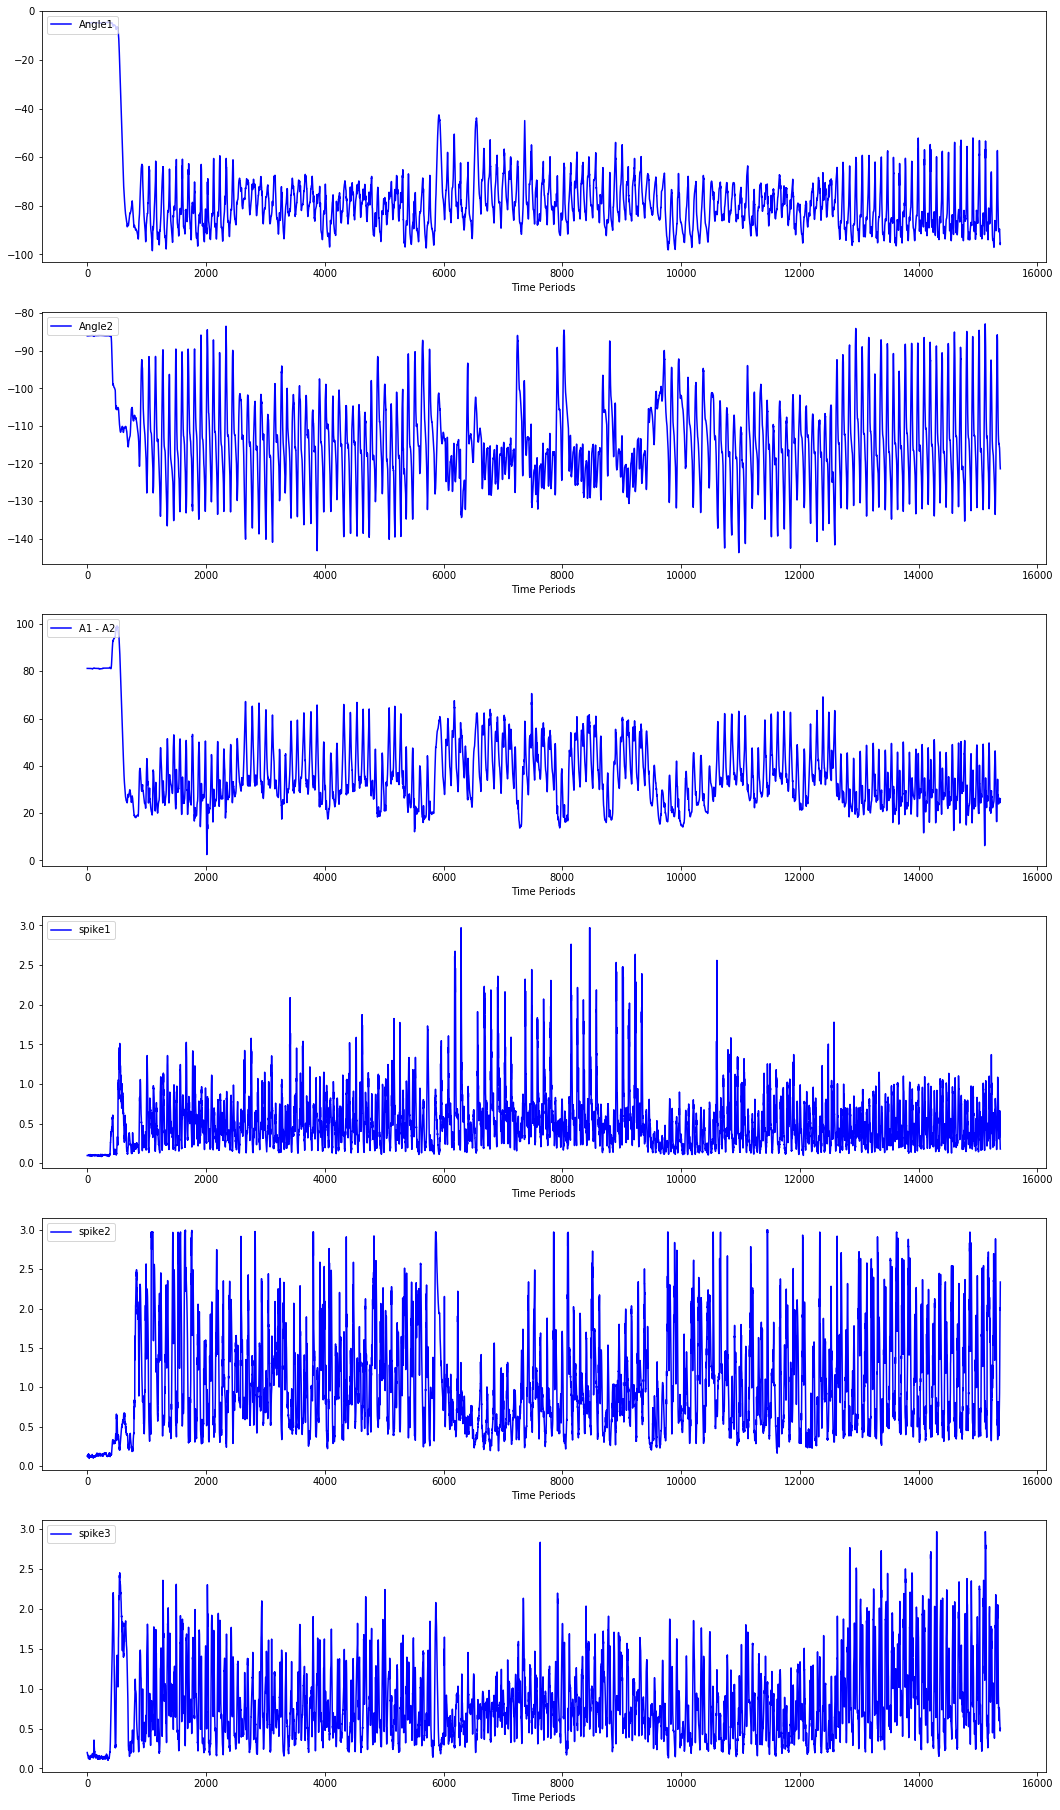

In [15]:
mcu_test5 = srtp.read_data("SRTP_Mea_2_2\\MCU_Test_4.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 8,print_shape = True)
srtp.main_visualize(mcu_test5,1000,50000,color = 'b',line_type = '-')

In [16]:
num_periods = 1080
f_horizon = 5

mean1 = -80 
std1 = 15 
meanw1 = 0
stdw1 = 75

mean2 = -110
std2 = 15
meanw2 = 0
stdw2 = 90

meany = 35
stdy = 15

In [17]:
for i in range(1,filenum + 1):
    data_dict['normalizeddata' + str(i)] = data_dict['data'+str(i)].copy()
    temp1 = data_dict['data' + str(i)][f_horizon:,0]
    temp2 = data_dict['data' + str(i)][f_horizon:,2]
    data_dict['truey' + str(i)] = (temp1 - temp2).reshape(-1,1)
    data_dict['normalizeddata' + str(i)][:,0] = (data_dict['data' + str(i)][:,0] - mean1) / std1
    data_dict['normalizeddata' + str(i)][:,1] = (data_dict['data' + str(i)][:,1] - meanw1) / stdw1
    data_dict['normalizeddata' + str(i)][:,2] = (data_dict['data' + str(i)][:,2] - mean2) / std2
    data_dict['normalizeddata' + str(i)][:,3] = (data_dict['data' + str(i)][:,3] - meanw2) / stdw2
    data_dict['normalizeddata' + str(i)][:,4] = data_dict['data' + str(i)][:,4] / 3
    data_dict['normalizeddata' + str(i)][:,5] = data_dict['data' + str(i)][:,5] / 3
    data_dict['normalizeddata' + str(i)][:,6] = data_dict['data' + str(i)][:,6] / 3

In [18]:
for i in range(1,filenum + 1):
    data_dict['normalizeddata' + str(i)] = data_dict['normalizeddata' + str(i)][:-f_horizon,:]
    data_dict['truey' + str(i)] = (data_dict['truey' + str(i)] - meany)/stdy

In [19]:
data_dict['normalizeddata1'].shape

(14970, 8)

In [20]:
test_length = 4000;
breakpointset = [8000,22000,11397,5000,12000,13017,3000,12701,6033,3768,5654,39301,32575];
for i in range(1,filenum + 1):
    #breakpoint = np.random.randint(1100,data_dict['data'+str(i)].shape[0]-1200-test_length);
    if(i>len(breakpointset) or breakpointset[i-1] == None):
        breakpoint = np.random.randint(1100,data_dict['data'+str(i)].shape[0]-1200-test_length);
    else:
        breakpoint = breakpointset[i-1]
    print(breakpoint)
    data_dict['testx' + str(i)] = data_dict['normalizeddata' + str(i)][breakpoint:breakpoint+test_length,:].copy()
    data_dict['testy' + str(i)] = data_dict['truey' + str(i)][breakpoint:breakpoint+test_length,:].copy()
    data_dict['datax' + str(2*i - 1)] = data_dict['normalizeddata' + str(i)][:breakpoint,:].copy()
    data_dict['datay' + str(2*i - 1)] = data_dict['truey' + str(i)][:breakpoint,:].copy()
    data_dict['datax' + str(2*i)] = data_dict['normalizeddata'+str(i)][breakpoint + test_length:,:].copy()
    data_dict['datay' + str(2*i)] = data_dict['truey' + str(i)][breakpoint+test_length:,:].copy()

8000
22000
11397
5000
12000
13017
3000
12701
6033
3768
5654


## SVR

In [22]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
clf1 = SVR(C=10, epsilon=0.1,verbose = 1,max_iter = 20000)
clf2 = SVR(C=10, epsilon=0.1,verbose = 1,max_iter = 8000)
clf3 = SVR(C=10, epsilon=0.1,verbose = 1,max_iter = 8000)
clf4 = SVR(C=10, epsilon=0.1,verbose = 1,max_iter = 8000)

In [23]:
number = 0
recent = 5
for i in range(1,20,7):
    number += (data_dict['datay' + str(i)].shape[0]- recent)
print(number)

datax = np.zeros([number,7 *recent])
datay = np.zeros([number,1])

ptr = 0
for i in range(1,20,7):
    number1 = data_dict['datay' + str(i)].shape[0] - recent
    for j in range(recent):
        datax[ptr:ptr+number1,7*j:7*j+7] = data_dict['datax' + str(i)][j:j+number1,0:7].copy()
    datay[ptr:ptr+number1,:] = data_dict['datay' + str(i)][recent:,:].copy()
    ptr += number1
clf1.fit(datax,datay)

40521
[LibSVM]

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python36\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=20000, shrinking=True, tol=0.001, verbose=1)

In [24]:
mean_squared_error(datay,clf1.predict(datax) ) * 225

3.8471774725147956

In [36]:
number = 0
for i in range(2,20,4):
    number += (data_dict['datay' + str(i)].shape[0]-5)
print(number)

datax = np.zeros([number,35])
datay = np.zeros([number,1])

ptr = 0
for i in range(2,20,4):
    number1 = data_dict['datay' + str(i)].shape[0] - 5
    for j in range(5):
        datax[ptr:ptr+number1,7*j:7*j+7] = data_dict['datax' + str(i)][j:j+number1,0:7].copy()
    datay[ptr:ptr+number1,:] = data_dict['datay' + str(i)][5:,:].copy()
    ptr += number1
clf2.fit(datax,datay)

54273
[LibSVM]

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python36\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=8000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=8000, shrinking=True, tol=0.001, verbose=1)

In [37]:
mean_squared_error(datay,clf2.predict(datax) ) * 225

7.633990006662688

In [38]:
number = 0
for i in range(3,20,4):
    number += (data_dict['datay' + str(i)].shape[0]-5)
print(number)

datax = np.zeros([number,35])
datay = np.zeros([number,1])

ptr = 0
for i in range(3,20,4):
    number1 = data_dict['datay' + str(i)].shape[0] - 5
    for j in range(5):
        datax[ptr:ptr+number1,7*j:7*j+7] = data_dict['datax' + str(i)][j:j+number1,0:7].copy()
    datay[ptr:ptr+number1,:] = data_dict['datay' + str(i)][5:,:].copy()
    ptr += number1
clf3.fit(datax,datay)

56461
[LibSVM]

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python36\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=8000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=8000, shrinking=True, tol=0.001, verbose=1)

In [39]:
mean_squared_error(datay,clf3.predict(datax) ) * 225

6.993316891207846

In [40]:
number = 0
for i in range(4,20,4):
    number += (data_dict['datay' + str(i)].shape[0]-5)
print(number)

datax = np.zeros([number,35])
datay = np.zeros([number,1])

ptr = 0
for i in range(4,20,4):
    number1 = data_dict['datay' + str(i)].shape[0] - 5
    for j in range(5):
        datax[ptr:ptr+number1,7*j:7*j+7] = data_dict['datax' + str(i)][j:j+number1,0:7].copy()
    datay[ptr:ptr+number1,:] = data_dict['datay' + str(i)][5:,:].copy()
    ptr += number1
clf4.fit(datax,datay)

50389
[LibSVM]

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python36\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=8000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=8000, shrinking=True, tol=0.001, verbose=1)

In [41]:
mean_squared_error(datay,clf4.predict(datax) ) * 225

8.431982281622261

In [42]:
number = 0
for i in range(1,10):
    number += (data_dict['testy' + str(i)].shape[0]-5)
print(number)

datax = np.zeros([number,35])
datay = np.zeros([number,1])

ptr = 0
for i in range(1,10):
    number1 = data_dict['testy' + str(i)].shape[0] - 5
    for j in range(5):
        datax[ptr:ptr+number1,7*j:7*j+7] = data_dict['testx' + str(i)][j:j+number1,0:7].copy()
    datay[ptr:ptr+number1,:] = data_dict['testy' + str(i)][5:,:].copy()
    ptr += number1

35955


In [43]:
mean_squared_error(datay, 0.25*clf1.predict(datax) + 0.25 * clf2.predict(datax) + 0.25*clf3.predict(datax)+0.25*clf4.predict(datax) ) * 225

12.307874234046613

In [44]:
recent = 5
mcu_x = mcu_test5[100:-5,0:7]
    
mcu_y = mcu_test5[100+5+recent:,0] - mcu_test5[100+5+recent:,2] 
    
testy = ((mcu_y - 35)/15).reshape([-1,1])
X = mcu_x.copy()
X[:,0] = (X[:,0] - mean1)/std1
X[:,1] = (X[:,1] - meanw1)/stdw1
X[:,2] = (X[:,2] - mean2)/std2
X[:,3] = (X[:,3] - meanw2)/stdw2
X[:,4] = (X[:,4] - 0)/3
X[:,5] = (X[:,5] - 0)/3
X[:,6] = (X[:,6] - 0)/3
    #testy = data_dict[string+'y'+str(num)][recent:,:].reshape([-1,1])
    #X = data_dict[string+'x' + str(num)].copy()
testx = np.zeros([X.shape[0] - recent,recent * 7])
testx = np.zeros([X.shape[0] - recent,recent * 7])
for i in range(recent):
    if(i == 0):
        testx[:,7*i:7*i+7] = X[recent:,0:7];
    else:
        testx[:,7*i:7*i+7] = X[recent-i:-i,0:7];

In [45]:
mean_squared_error(testy, 0.25*clf1.predict(testx) + 0.25 * clf2.predict(testx) + 0.25*clf3.predict(testx)+0.25*clf4.predict(testx) ) * 225

34.12456197821788

In [46]:
mcu_x = mcu_test4[100:-5,0:7]
    
mcu_y = mcu_test4[100+5+recent:,0] - mcu_test4[100+5+recent:,2] 
    
testy = ((mcu_y - 35)/15).reshape([-1,1])
X = mcu_x.copy()
X[:,0] = (X[:,0] - mean1)/std1
X[:,1] = (X[:,1] - meanw1)/stdw1
X[:,2] = (X[:,2] - mean2)/std2
X[:,3] = (X[:,3] - meanw2)/stdw2
X[:,4] = (X[:,4] - 0)/3
X[:,5] = (X[:,5] - 0)/3
X[:,6] = (X[:,6] - 0)/3
    #testy = data_dict[string+'y'+str(num)][recent:,:].reshape([-1,1])
    #X = data_dict[string+'x' + str(num)].copy()
testx = np.zeros([X.shape[0] - recent,recent * 7])
testx = np.zeros([X.shape[0] - recent,recent * 7])
for i in range(recent):
    if(i == 0):
        testx[:,7*i:7*i+7] = X[recent:,0:7];
    else:
        testx[:,7*i:7*i+7] = X[recent-i:-i,0:7];

In [47]:
mean_squared_error(testy, 0.25*clf1.predict(testx) + 0.25 * clf2.predict(testx) + 0.25*clf3.predict(testx)+0.25*clf4.predict(testx) ) * 225

26.081293397329

In [57]:
clf5 = SVR(C = 10,epsilon = 0.1,max_iter = 20000)

In [58]:
number = 0
for i in range(1,20,1):
    number += (data_dict['datay' + str(i)].shape[0]-5)
print(number)

datax = np.zeros([number,35])
datay = np.zeros([number,1])

ptr = 0
for i in range(1,20,1):
    number1 = data_dict['datay' + str(i)].shape[0] - 5
    for j in range(5):
        datax[ptr:ptr+number1,7*j:7*j+7] = data_dict['datax' + str(i)][j:j+number1,0:7].copy()
    datay[ptr:ptr+number1,:] = data_dict['datay' + str(i)][5:,:].copy()
    ptr += number1
clf5.fit(datax,datay)

201528


c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python36\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=20000, shrinking=True, tol=0.001, verbose=False)

In [59]:
mean_squared_error(datay, clf5.predict(datax) ) * 225

10.062996551001449

In [60]:
number = 0
for i in range(1,10):
    number += (data_dict['testy' + str(i)].shape[0]-5)
print(number)

datax = np.zeros([number,35])
datay = np.zeros([number,1])

ptr = 0
for i in range(1,10):
    number1 = data_dict['testy' + str(i)].shape[0] - 5
    for j in range(5):
        datax[ptr:ptr+number1,7*j:7*j+7] = data_dict['testx' + str(i)][j:j+number1,0:7].copy()
    datay[ptr:ptr+number1,:] = data_dict['testy' + str(i)][5:,:].copy()
    ptr += number1

35955


In [61]:
mean_squared_error(datay, clf5.predict(datax) ) * 225

10.28427193445239

In [62]:
mcu_x = mcu_test4[100:-5,0:7]
    
mcu_y = mcu_test4[100+5+recent:,0] - mcu_test4[100+5+recent:,2] 
    
testy = ((mcu_y - 35)/15).reshape([-1,1])
X = mcu_x.copy()
X[:,0] = (X[:,0] - mean1)/std1
X[:,1] = (X[:,1] - meanw1)/stdw1
X[:,2] = (X[:,2] - mean2)/std2
X[:,3] = (X[:,3] - meanw2)/stdw2
X[:,4] = (X[:,4] - 0)/3
X[:,5] = (X[:,5] - 0)/3
X[:,6] = (X[:,6] - 0)/3
    #testy = data_dict[string+'y'+str(num)][recent:,:].reshape([-1,1])
    #X = data_dict[string+'x' + str(num)].copy()
testx = np.zeros([X.shape[0] - recent,recent * 7])
testx = np.zeros([X.shape[0] - recent,recent * 7])
for i in range(recent):
    if(i == 0):
        testx[:,7*i:7*i+7] = X[recent:,0:7];
    else:
        testx[:,7*i:7*i+7] = X[recent-i:-i,0:7];

mean_squared_error(testy, clf5.predict(testx) ) * 225

In [64]:
recent = 5
mcu_x = mcu_test5[100:-5,0:7]
    
mcu_y = mcu_test5[100+5+recent:,0] - mcu_test5[100+5+recent:,2] 
    
testy = ((mcu_y - 35)/15).reshape([-1,1])
X = mcu_x.copy()
X[:,0] = (X[:,0] - mean1)/std1
X[:,1] = (X[:,1] - meanw1)/stdw1
X[:,2] = (X[:,2] - mean2)/std2
X[:,3] = (X[:,3] - meanw2)/stdw2
X[:,4] = (X[:,4] - 0)/3
X[:,5] = (X[:,5] - 0)/3
X[:,6] = (X[:,6] - 0)/3
    #testy = data_dict[string+'y'+str(num)][recent:,:].reshape([-1,1])
    #X = data_dict[string+'x' + str(num)].copy()
testx = np.zeros([X.shape[0] - recent,recent * 7])
testx = np.zeros([X.shape[0] - recent,recent * 7])
for i in range(recent):
    if(i == 0):
        testx[:,7*i:7*i+7] = X[recent:,0:7];
    else:
        testx[:,7*i:7*i+7] = X[recent-i:-i,0:7];

In [65]:
mean_squared_error(testy, clf5.predict(testx) ) * 225

36.871080613842565

# ANN

In [25]:
    ckptname = 'fully-connected'
    saver_name = ckptname
    learning_rate = 0.0003
    beta = 0.00001
    epochs = 0
    ration = 1
    cluster_num = 64
    recent = 5
    
    inputs = recent*7
    outputshape = 1
    num_periods = 1080

    hidden1 = 50
    hidden2 = 40
    hidden3 = 35
    hidden4 = 30
    hidden5 = 25

    tf.reset_default_graph()
    
    x = tf.placeholder(tf.float32,[None,inputs])
    y = tf.placeholder(tf.float32,[None,outputshape]);
    
    hidden_layer1 = tf.layers.dense(x,hidden1,name = 'hidden1')
    hidden_layer2 = tf.layers.dense(tf.nn.relu(hidden_layer1),hidden2,name = 'hidden2')
    hidden_layer3 = tf.layers.dense(tf.nn.relu(hidden_layer2),hidden3,name = 'hidden3')
    hidden_layer4 = tf.layers.dense(tf.nn.relu(hidden_layer3),hidden4,name = 'hidden4')
    hidden_layer5 = tf.layers.dense(tf.nn.relu(hidden_layer4),hidden5,name = 'hidden5')
    outputs = tf.layers.dense(tf.nn.relu(hidden_layer5),outputshape,name = 'outputs')

    MSE = tf.reduce_mean(tf.square(outputs[:,:] - y[:,:]))

    Qua = tf.reduce_mean(tf.square(tf.square(
                            outputs[:,:] - y[:,:]
                                       ) ) )

    Regulizer = beta*(tf.nn.l2_loss(tf.trainable_variables('hidden1')[0])+
                      tf.nn.l2_loss(tf.trainable_variables('hidden2')[0])+
                      tf.nn.l2_loss(tf.trainable_variables('hidden3')[0])+
                      tf.nn.l2_loss(tf.trainable_variables('hidden4')[0])+
                      tf.nn.l2_loss(tf.trainable_variables('hidden5')[0])+
                      tf.nn.l2_loss(tf.trainable_variables('outputs')[0])
                      )
    loss = tf.add(tf.add(Qua,Regulizer),ration*MSE)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
    gvs = optimizer.compute_gradients(loss)
    capped_gvs = [(tf.clip_by_value(grad,-0.5,0.5),var) for grad,var in gvs]
    training_op = optimizer.apply_gradients(capped_gvs)
    init = tf.global_variables_initializer()
    mse = 0
    List1 = []
    x_data = np.zeros([cluster_num,inputs])
    y_data = np.zeros([cluster_num,outputshape])
    #y_data = np.zeros((cluster_num,num_periods,outputshape))

    for i in range(1,2*filenum + 1):
        List1.append(data_dict['datax' + str(i)].shape[0] - recent)
    with tf.Session() as sess:
        #init.run()
        saver = tf.train.Saver()
        checkpoint_filepath = 'ckptset\\' + ckptname
        saver.restore(sess,checkpoint_filepath)
        term = 0
        for ep in range(epochs):
            source = np.random.randint(1,2*filenum + 1,cluster_num,dtype = int)
            
            for i in range(cluster_num):
                index = np.random.randint(0,List1[source[i]-1])
                for j in range(recent):
                    x_data[i,j*7:j*7+7] = data_dict['datax' + str(source[i])][index - j,0:7]
                #data_angle[i,:,:] = data_dict['datax' + str(source[i])][index:index+num_periods,0:4]
                #data_emg[i,:,:] = data_dict['datax' + str(source[i])][index:index+num_periods,4:7]
                y_data[i,:] = data_dict['datay' + str(source[i])][index,:]
            sess.run(training_op,feed_dict = { x:x_data,y:y_data})
            if ep%5 == 0:
                mse +=MSE.eval(feed_dict = {x:x_data,y:y_data})
                term += 1
            if ep%1000 == 0:
                mse /= term
                print(ep,"\tMSE:",mse)
                term = 0
                mse = 0
        hidden1_params = sess.run(tf.trainable_variables('hidden1'))
        hidden2_params = sess.run(tf.trainable_variables('hidden2'))
        hidden3_params = sess.run(tf.trainable_variables('hidden3'))
        hidden4_params = sess.run(tf.trainable_variables('hidden4'))
        hidden5_params = sess.run(tf.trainable_variables('hidden5'))
        output_params = sess.run(tf.trainable_variables('outputs'))
        saver = tf.train.Saver()
        save_path = saver.save(sess, 'ckptset\\'+ saver_name);
        #params_list = [rnn_params,emg_params,dense1_params,hidden_dense_params,dense2_params]

INFO:tensorflow:Restoring parameters from ckptset\fully-connected


In [49]:
recent = 5

In [50]:
def verify(string,num,is_printout):    
    alpha = 0.00001
    start = 0
    end = 50000
    hiddenW1 = hidden1_params[0]
    hiddenb1 = hidden1_params[1]
    hiddenW2 = hidden2_params[0]
    hiddenb2 = hidden2_params[1]
    hiddenW3 = hidden3_params[0]
    hiddenb3 = hidden3_params[1]
    hiddenW4 = hidden4_params[0]
    hiddenb4 = hidden4_params[1]
    hiddenW5 = hidden5_params[0]
    hiddenb5 = hidden5_params[1]
    outputW1 = output_params[0].copy()
    outputb1 = output_params[1].copy()
    
    #mcu_x = mcu_test4[100:-5,0:7]
    
    #mcu_y = mcu_test4[100+5+recent:,0] - mcu_test4[100+5+recent:,2] 
    
    #testy = ((mcu_y - 35)/15).reshape([-1,1])
    #X = mcu_x.copy()
    #X[:,0] = (X[:,0] - mean1)/std1
    #X[:,1] = (X[:,1] - meanw1)/stdw1
    #X[:,2] = (X[:,2] - mean2)/std2
    #X[:,3] = (X[:,3] - meanw2)/stdw2
    #X[:,4] = (X[:,4] - 0)/3
    #X[:,5] = (X[:,5] - 0)/3
    #X[:,6] = (X[:,6] - 0)/3
    testy = data_dict[string+'y'+str(num)][recent:,:].reshape([-1,1])
    X = data_dict[string+'x' + str(num)].copy()
    testx = np.zeros([X.shape[0] - recent,recent * 7])
    for i in range(recent):
        if(i == 0):
            testx[:,7*i:7*i+7] = X[recent:,0:7];
        else:
            testx[:,7*i:7*i+7] = X[recent-i:-i,0:7];
    
    finaloutput = np.zeros(testy.shape)
    ####         FeedBack                ######
    
    Queue_hidden2 = np.zeros((5,25))
    ptr = 0;
    
    ####                                 #####
    #finaloutput = np.zeros((testx.shape[0],outputsize))
    unnormal = np.zeros(finaloutput.shape)
    for i in range(testx.shape[0]):
        hidden1 = testx[i,:].dot(hiddenW1) + hiddenb1
        hidden1[hidden1<0] = 0
        
        hidden2 = hidden1.dot(hiddenW2) + hiddenb2
        hidden2[hidden2<0] = 0
        
        hidden3 = hidden2.dot(hiddenW3) + hiddenb3
        hidden3[hidden3<0] = 0
        
        hidden4 = hidden3.dot(hiddenW4) + hiddenb4
        hidden4[hidden4<0] = 0
        
        hidden5 = hidden4.dot(hiddenW5) + hiddenb5
        hidden5[hidden5<0] = 0
        output = (hidden5.dot(outputW1) + outputb1).reshape([-1,1])
        finaloutput[i,:] = output
        if(i==0):
            pass
        elif(i<5):
            pass
          ### Feedback here  #### 
        else:
            x_k5 = (testx[i,0]*std1+mean1-(testx[i,2]*std2 + mean2) - meany)/stdy
            y_k = finaloutput[i-5,:]
            diff = x_k5 - y_k
            outputW1 += alpha * (diff) * Queue_hidden2[ptr,:].reshape([25,1])
            outputb1 += alpha * diff
           
        Queue_hidden2[ptr,:] = output[0]
        ptr = (ptr+1)%5
        
    RNNmse = np.mean(np.square(finaloutput[start:end,:] - testy[start:end,:])*stdy**2)
    RNNmse2 = np.mean(np.square(finaloutput[start:end,:] - testy[start:end,:]))
    RNNqua = np.mean(np.square(np.square(finaloutput[start:end,:] - testy[start:end,:])))
    
    
    if(is_printout):

        #another naive method
        naivey = np.zeros(testy.shape)
        index = 1000
        naivemse2 = 1000;
        for i in range(200):
            naivey[:,0] = ((testx[:,0]*std1 + mean1 + (testx[:,1]*stdw1+meanw1)*0.01*(i-100))
                       - (testx[:,2]*std2 + mean2 + (testx[:,3]*stdw2+meanw2)*0.01*(i-100)))
            naivemse1 = np.mean(np.square(naivey[start:end,:] - testy[start:end,:]*stdy-meany))
            if(naivemse1<naivemse2):
                index = (i-100)
                naivemse2 = np.min((naivemse1,naivemse2))

        naivey[:,0] = ((testx[:,0]*std1 + mean1 + (testx[:,1]*stdw1+meanw1)*0.01*index)
                       - (testx[:,2]*std2 + mean2 + (testx[:,3]*stdw2+meanw2)*0.01*index))

        print("RNN mse:",RNNmse)
        #print("RNN normalized mse",RNNmse2)
        #print('Fourth order',RNNqua)
        print("naive mse:",np.min((naivemse1,naivemse2)))
        print('naive guess:',index)

        plt.figure(1,figsize = (18,1*5.4))
        plt.title("Angle diff Forecast vs Actual",fontsize = 14)

        plt.plot(pd.Series(testx[start:end,0]*std1+mean1 - testx[start:end,2]*std2-mean2),'y-',markersize = 1,label = 'Current Info')
        plt.plot(pd.Series(np.ravel(testy[start:end,0]*stdy+meany)),"b-",markersize = 1,label = 'Actual')
        plt.plot(pd.Series(np.ravel(finaloutput[start:end,0]*stdy+meany)),"r-",markersize = 1,label = 'Forecast')
        #plt.plot(pd.Series(naivey[start:end,0]),'g-',markersize = 1,label = 'naive guess')
        plt.legend(loc = "upper left")
        plt.xlabel("Time Periods")

        plt.show()
    return [RNNmse,RNNqua]

In [ ]:
mse = 0
for i in range(1,21):
    RNNmse = verify('data',i,False)
    mse += RNNmse[0]
    
mse /= 20

In [ ]:
mse

In [ ]:
mse = 0
for i in range(1,11):
    RNNmse = verify('test',i,False)
    mse += RNNmse[0]
    
mse /= 10

In [ ]:
mse

RNN mse: 2.988896734693879
ANN mse: 3.9501170823949043
SVR mse: 11.491032842014484
naive mse: 7.723430624280009


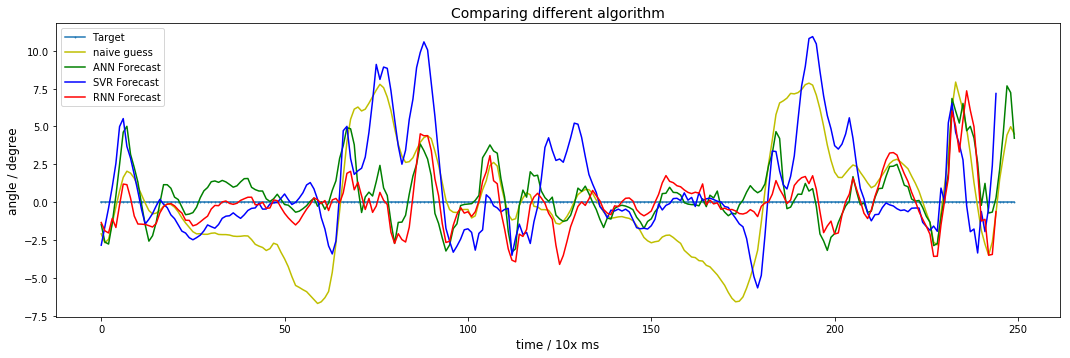

In [27]:
    alpha = 0.0001
    start = 8030
    end = 8280
    recent = 5
    hiddenW1 = hidden1_params[0]
    hiddenb1 = hidden1_params[1]
    hiddenW2 = hidden2_params[0]
    hiddenb2 = hidden2_params[1]
    hiddenW3 = hidden3_params[0]
    hiddenb3 = hidden3_params[1]
    hiddenW4 = hidden4_params[0]
    hiddenb4 = hidden4_params[1]
    hiddenW5 = hidden5_params[0]
    hiddenb5 = hidden5_params[1]
    outputW1 = output_params[0].copy()
    outputb1 = output_params[1].copy()
    
    mcu_x = mcu_test4[100:-5,0:7]
    
    mcu_y = mcu_test4[100+5+recent:,0] - mcu_test4[100+5+recent:,2] 
    
    testy = ((mcu_y - 35)/15).reshape([-1,1])
    X = mcu_x.copy()
    X[:,0] = (X[:,0] - mean1)/std1
    X[:,1] = (X[:,1] - meanw1)/stdw1
    X[:,2] = (X[:,2] - mean2)/std2
    X[:,3] = (X[:,3] - meanw2)/stdw2
    X[:,4] = (X[:,4] - 0)/3
    X[:,5] = (X[:,5] - 0)/3
    X[:,6] = (X[:,6] - 0)/3
    #testy = data_dict[string+'y'+str(num)][recent:,:].reshape([-1,1])
    #X = data_dict[string+'x' + str(num)].copy()
    testx = np.zeros([X.shape[0] - recent,recent * 7])
    for i in range(recent):
        if(i == 0):
            testx[:,7*i:7*i+7] = X[recent:,0:7];
        else:
            testx[:,7*i:7*i+7] = X[recent-i:-i,0:7];
    
    finaloutput = np.zeros(testy.shape)
    ####         FeedBack                ######
    
    Queue_hidden2 = np.zeros((5,25))
    ptr = 0;
    
    ####                                 #####
    #finaloutput = np.zeros((testx.shape[0],outputsize))
    unnormal = np.zeros(finaloutput.shape)
    for i in range(testx.shape[0]):
        hidden1 = testx[i,:].dot(hiddenW1) + hiddenb1
        hidden1[hidden1<0] = 0
        
        hidden2 = hidden1.dot(hiddenW2) + hiddenb2
        hidden2[hidden2<0] = 0
        
        hidden3 = hidden2.dot(hiddenW3) + hiddenb3
        hidden3[hidden3<0] = 0
        
        hidden4 = hidden3.dot(hiddenW4) + hiddenb4
        hidden4[hidden4<0] = 0
        
        hidden5 = hidden4.dot(hiddenW5) + hiddenb5
        hidden5[hidden5<0] = 0
        output = (hidden5.dot(outputW1) + outputb1).reshape([-1,1])
        finaloutput[i,:] = output
        if(i==0):
            pass
        elif(i<5):
            pass
          ### Feedback here  #### 
        else:
            x_k5 = (testx[i,0]*std1+mean1-(testx[i,2]*std2 + mean2) - meany)/stdy
            y_k = finaloutput[i-5,:]
            diff = x_k5 - y_k
            outputW1 += alpha * (diff) * Queue_hidden2[ptr,:].reshape([25,1])
            outputb1 += alpha * diff
           
        Queue_hidden2[ptr,:] = output[0]
        ptr = (ptr+1)%5
    
    RNNmse = np.mean(np.square(finaloutput[start:end,:] - testy[start:end,:])*stdy**2)
    RNNmse2 = np.mean(np.square(finaloutput[start:end,:] - testy[start:end,:]))
    RNNqua = np.mean(np.square(np.square(finaloutput[start:end,:] - testy[start:end,:])))
    if(True):

        #another naive method
        naivey = np.zeros(testy.shape)
        index = 1000
        naivemse2 = 1000;
        for i in range(200):
            naivey[:,0] = ((testx[:,0]*std1 + mean1 + (testx[:,1]*stdw1+meanw1)*0.01*(i-100))
                       - (testx[:,2]*std2 + mean2 + (testx[:,3]*stdw2+meanw2)*0.01*(i-100)))
            naivemse1 = np.mean(np.square(naivey[start:end,:] - testy[start:end,:]*stdy-meany))
            if(naivemse1<naivemse2):
                index = (i-100)
                naivemse2 = np.min((naivemse1,naivemse2))

        naivey[:,0] = ((testx[:,0]*std1 + mean1 + (testx[:,1]*stdw1+meanw1)*0.01*index)
                       - (testx[:,2]*std2 + mean2 + (testx[:,3]*stdw2+meanw2)*0.01*index))
        
        mcupred = mcu_test4[100:-5,7]
        mcu_y = mcu_test4[100+5:,0] - mcu_test4[100+5:,2] 
        SVR_y = clf1.predict(testx[:,:]) * stdy + meany
        
        print("RNN mse:",np.mean(np.square(mcupred[start+5:end] - mcu_y[start+5:end])))
        print("ANN mse:",RNNmse)
        print('SVR mse:',np.mean(np.square(SVR_y[start+5:end] - mcu_y[start+5:end])))
        #print("RNN normalized mse",RNNmse2)
        #print('Fourth order',RNNqua)
        print("naive mse:",np.min((naivemse1,naivemse2)))
        #print('naive guess:',index)

        plt.figure(1,figsize = (18,1*5.4))
        plt.title("Comparing different algorithm",fontsize = 14)
        
        plt.plot(pd.Series(np.zeros([end-start])),'p-',markersize = 1, label = 'Target')

        plt.plot(pd.Series(testx[start:end,0]*std1+mean1 - testx[start:end,2]*std2-mean2 - testy[start:end,0]*stdy-meany),'y-',markersize = 1,label = 'naive guess')
        #plt.plot(pd.Series(np.ravel(testy[start:end,0]*stdy+meany)),"b-",markersize = 1,label = 'Actual')
        plt.plot(pd.Series(np.ravel(finaloutput[start:end,0]*stdy+meany - testy[start:end,0]*stdy-meany)),"g-",markersize = 1,label = 'ANN Forecast')
        #plt.plot(pd.Series(naivey[start:end,0]),'g-',markersize = 1,label = 'naive guess')
        plt.plot(pd.Series(SVR_y[start+5:end] - mcu_y[start+5:end]),'b-',label = 'SVR Forecast')
        plt.plot(pd.Series(mcupred[start+5:end] - mcu_y[start+5:end]),'r-',label = 'RNN Forecast')
        plt.legend(loc = "upper left")
        plt.xlabel('time / 10x ms',fontsize = 'large')
        plt.ylabel('angle / degree',fontsize = 'large')

        plt.show()

In [ ]:
testy.shape

In [ ]:
testy.shape

In [ ]:
mcu_test5[recent:,2].shape

In [ ]:
output

In [ ]:
hidden_layer2 = tf.layers.dense(tf.nn.relu(hidden_layer1),hidden2,name = 'hidden2')